# Imports

In [43]:
using DataFrames
using CSV
using MLJ
using Plots
using StatsBase
using Distances

include("../../lib.jl")

ENV["LINES"]=30;

# Datasets

In [5]:
df = CSV.read("data.csv")

,Class,Instance,Nucleotide_Sequence
,String,String,String
1,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG
2,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC
3,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG
4,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC
5,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCCCGGCCCTTGACCCT
6,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAAGAGAGGGCCAAGCTCAGAGACCACAG
7,EI,CHPIGECA-DONOR-903,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTACGTTCCCACCTGCCCTGGTGGCCGCCA
8,EI,CHPIGECA-DONOR-1313,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGAGCCACGGGCAGGCCGGGGTCGTGGGG
9,EI,GCRHBBA1-DONOR-1260,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGAGGACCCTCCTGTCCCTGCTCCAGTCC


In [6]:
data = separate_bases(df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,67.0,67.0,65.0,71.0,67.0,84.0,71.0,67.0,65.0
2,65.0,71.0,65.0,67.0,67.0,67.0,71.0,67.0,67.0
3,71.0,65.0,71.0,71.0,84.0,71.0,65.0,65.0,71.0
4,71.0,71.0,71.0,67.0,84.0,71.0,67.0,71.0,84.0
5,71.0,67.0,84.0,67.0,65.0,71.0,67.0,67.0,67.0
6,67.0,65.0,71.0,65.0,67.0,84.0,71.0,71.0,71.0
7,67.0,67.0,84.0,84.0,84.0,71.0,65.0,71.0,71.0
8,67.0,67.0,67.0,84.0,67.0,71.0,84.0,71.0,67.0
9,84.0,71.0,71.0,67.0,71.0,65.0,67.0,84.0,65.0


In [7]:
data = hcat(df,data)

,Class,Instance,Nucleotide_Sequence
,String,String,String
1,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG
2,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC
3,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG
4,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC
5,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCCCGGCCCTTGACCCT
6,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAAGAGAGGGCCAAGCTCAGAGACCACAG
7,EI,CHPIGECA-DONOR-903,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTACGTTCCCACCTGCCCTGGTGGCCGCCA
8,EI,CHPIGECA-DONOR-1313,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGAGCCACGGGCAGGCCGGGGTCGTGGGG
9,EI,GCRHBBA1-DONOR-1260,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGAGGACCCTCCTGTCCCTGCTCCAGTCC


In [8]:
# data[:,3:5]

In [9]:
data = data[:, Not(2:3)]

,Class,x1,x2,x3,x4,x5,x6,x7,x8
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,EI,67.0,67.0,65.0,71.0,67.0,84.0,71.0,67.0
2,EI,65.0,71.0,65.0,67.0,67.0,67.0,71.0,67.0
3,EI,71.0,65.0,71.0,71.0,84.0,71.0,65.0,65.0
4,EI,71.0,71.0,71.0,67.0,84.0,71.0,67.0,71.0
5,EI,71.0,67.0,84.0,67.0,65.0,71.0,67.0,67.0
6,EI,67.0,65.0,71.0,65.0,67.0,84.0,71.0,71.0
7,EI,67.0,67.0,84.0,84.0,84.0,71.0,65.0,71.0
8,EI,67.0,67.0,67.0,84.0,67.0,71.0,84.0,71.0
9,EI,84.0,71.0,71.0,67.0,71.0,65.0,67.0,84.0


Look at class labels to see if dataset is imbalanced

In [10]:
label_counts = countmap(data[:Class])

Dict{String,Int64} with 3 entries:
  "IE" => 768
  "EI" => 767
  "N"  => 1655

In [11]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

3-element Array{Float64,1}:
 0.24075235109717869
 0.24043887147335424
 0.5188087774294671

Get data ready for training

In [12]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ Class   │ CategoricalValue{String,UInt32} │ Multiclass{3} │
│ x1      │ Float64                         │ Continuous    │
│ x2      │ Float64                         │ Continuous    │
│ x3      │ Float64                         │ Continuous    │
│ x4      │ Float64                         │ Continuous    │
│ x5      │ Float64                         │ Continuous    │
│ x6      │ Float64                         │ Continuous    │
│ x7      │ Float64                         │ Continuous    │
│ x8      │ Float64                         │ Continuous    │
│ x9      │ Float64                         │ Continuous    │
│ x10     │ Float64                         │ Continuous    │
│ x11     │ Float64                         │ Continuous    │
│ x12     │ Float64                         │ Continuous    │
│ x13   

In [13]:
y, X = unpack(data, ==(:Class), colname->true)

(CategoricalValue{String,UInt32}["EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI"  …  "N", "N", "N", "N", "N", "N", "N", "N", "N", "N"], 3190×60 DataFrame. Omitted printing of 53 columns
│ Row  │ x1      │ x2      │ x3      │ x4      │ x5      │ x6      │ x7      │
│      │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ 67.0    │ 67.0    │ 65.0    │ 71.0    │ 67.0    │ 84.0    │ 71.0    │
│ 2    │ 65.0    │ 71.0    │ 65.0    │ 67.0    │ 67.0    │ 67.0    │ 71.0    │
│ 3    │ 71.0    │ 65.0    │ 71.0    │ 71.0    │ 84.0    │ 71.0    │ 65.0    │
│ 4    │ 71.0    │ 71.0    │ 71.0    │ 67.0    │ 84.0    │ 71.0    │ 67.0    │
│ 5    │ 71.0    │ 67.0    │ 84.0    │ 67.0    │ 65.0    │ 71.0    │ 67.0    │
│ 6    │ 67.0    │ 65.0    │ 71.0    │ 65.0    │ 67.0    │ 84.0    │ 71.0    │
│ 7    │ 67.0    │ 67.0    │ 84.0    │ 84.0    │ 84.0    │ 71.0    │ 65.0    │
│ 8    │ 67.0

Partition train and test data accoring to class labels

In [14]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.8, shuffle=true, rng=113, stratify=values(data[:Class])) # gives 70:30 split

([1538, 582, 137, 1511, 1964, 2204, 2888, 2375, 2864, 1387  …  656, 625, 283, 1076, 2074, 743, 3177, 530, 592, 2916], [898, 2807, 2307, 2787, 1648, 1390, 3044, 2312, 586, 1612  …  2993, 729, 3006, 958, 2551, 1687, 2792, 2185, 1273, 1616])

In [15]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

3-element Array{Float64,1}:
 0.24059561128526646
 0.5188087774294671
 0.24059561128526646

In [16]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

3-element Array{Float64,1}:
 0.2413793103448276
 0.5188087774294671
 0.23981191222570533

# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [17]:
models(matching(X,y))

42-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianLDA, package_name = ScikitLearn, ... )
 (name = BayesianQDA, package_name = ScikitLearn, ... )
 (name = BayesianSubspaceLDA, package_name = MultivariateStats, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_na

In [18]:
@load KNNClassifier

KNNClassifier(
    K = 5,
    algorithm = :kdtree,
    metric = Distances.Euclidean(0.0),
    leafsize = 10,
    reorder = true,
    weights = :uniform) @471

## K Nearest Neighbors
* Use different values of k.

1. https://alan-turing-institute.github.io/MLJ.jl/dev/composing_models/
1. https://github.com/KristofferC/NearestNeighbors.jl

#### No Pre-Processing

In [19]:
knn = KNNClassifier(K=5)

KNNClassifier(
    K = 5,
    algorithm = :kdtree,
    metric = Distances.Euclidean(0.0),
    leafsize = 10,
    reorder = true,
    weights = :uniform) @868

In [20]:
KNN = machine(knn, X, y)

Machine{KNNClassifier} @877 trained 0 times.
  args: 
    1:	Source @238 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @280 ⏎ `AbstractArray{Multiclass{3},1}`


In [21]:
fit!(KNN, rows=train)

┌ Info: Training Machine{KNNClassifier} @877.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{KNNClassifier} @877 trained 1 time.
  args: 
    1:	Source @238 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @280 ⏎ `AbstractArray{Multiclass{3},1}`


In [22]:
knn_acc = evaluate!(KNN, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:04


┌───────────────┬───────────────┬──────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                               │
├───────────────┼───────────────┼──────────────────────────────────────────┤
│ cross_entropy │ 3.15          │ [3.59, 2.62, 2.91, 3.58, 2.88, 3.32]     │
│ acc           │ 0.654         │ [0.626, 0.68, 0.65, 0.648, 0.685, 0.633] │
└───────────────┴───────────────┴──────────────────────────────────────────┘
_.per_observation = [[[0.916, 0.223, ..., 2.22e-16], [0.223, 0.223, ..., 1.61], [1.61, 0.223, ..., 0.223], [0.223, 0.916, ..., 36.0], [0.223, 0.511, ..., 0.223], [0.511, 2.22e-16, ..., 0.511]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [23]:
fitted_params(KNN)

(tree = NearestNeighbors.KDTree{StaticArrays.SArray{Tuple{60},Float64,1,60},Distances.Euclidean,Float64}
  Number of points: 2659
  Dimensions: 60
  Metric: Distances.Euclidean(0.0)
  Reordered: true,)

#### With Pre-Processing

In [24]:
knn = KNNClassifier(K=5)

KNNClassifier(
    K = 5,
    algorithm = :kdtree,
    metric = Distances.Euclidean(0.0),
    leafsize = 10,
    reorder = true,
    weights = :uniform) @524

In [25]:
standardizer = Standardizer()
stand = machine(standardizer, X[train,:])
fit!(stand)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @971.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


In [26]:
KNN = machine(knn, X_stand, y)

Machine{KNNClassifier} @998 trained 0 times.
  args: 
    1:	Source @849 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @114 ⏎ `AbstractArray{Multiclass{3},1}`


In [27]:
fit!(KNN, rows=train)

┌ Info: Training Machine{KNNClassifier} @998.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{KNNClassifier} @998 trained 1 time.
  args: 
    1:	Source @849 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @114 ⏎ `AbstractArray{Multiclass{3},1}`


In [28]:
knn_acc = evaluate!(KNN, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                 │
├───────────────┼───────────────┼────────────────────────────────────────────┤
│ cross_entropy │ 3.09          │ [2.72, 3.6, 3.72, 2.45, 2.85, 3.21]        │
│ acc           │ 0.644         │ [0.641, 0.632, 0.648, 0.647, 0.663, 0.633] │
└───────────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [[[0.916, 1.61, ..., 0.223], [0.223, 1.61, ..., 0.916], [2.22e-16, 0.916, ..., 36.0], [0.511, 0.223, ..., 2.22e-16], [0.916, 0.223, ..., 2.22e-16], [1.61, 0.511, ..., 1.61]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [29]:
# evaluate!(KNN, resampling=CV(shuffle=true), measure=[tnr,tpr,fnr,fpr], verbosity=1, operation=predict_mode)

In [30]:
fitted_params(KNN)

(tree = NearestNeighbors.KDTree{StaticArrays.SArray{Tuple{60},Float64,1,60},Distances.Euclidean,Float64}
  Number of points: 2659
  Dimensions: 60
  Metric: Distances.Euclidean(0.0)
  Reordered: true,)

### GridSearch / RandomSearch

#### Euclidean

In [31]:
knn_grid = KNNClassifier()

KNNClassifier(
    K = 5,
    algorithm = :kdtree,
    metric = Distances.Euclidean(0.0),
    leafsize = 10,
    reorder = true,
    weights = :uniform) @553

In [32]:
param1 = :K

r1 = range(knn_grid, param1, lower=1, upper=10, scale=:linear)

MLJBase.NumericRange(Int64, :K, ... )

In [33]:
self_tuning_knn_model = TunedModel(model=knn_grid,
                                    tuning=Grid(goal=100),
                                    resampling=CV(), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1])

ProbabilisticTunedModel(
    model = KNNClassifier(
            K = 5,
            algorithm = :kdtree,
            metric = Distances.Euclidean(0.0),
            leafsize = 10,
            reorder = true,
            weights = :uniform),
    tuning = Grid(
            goal = 100,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 6,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Int64,MLJBase.Bounded,Symbol}[NumericRange{Int64,…} @741],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(nothing),
    check_measure = true) @393

In [34]:
self_tuning_knn = machine(self_tuning_knn_model, X, y)

Machine{ProbabilisticTunedModel{Grid,…}} @867 trained 0 times.
  args: 
    1:	Source @741 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @820 ⏎ `AbstractArray{Multiclass{3},1}`


In [35]:
z = fit!(self_tuning_knn, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @867.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 10 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 10 metamodels: 100%[=========================] Time: 0:00:02


Machine{ProbabilisticTunedModel{Grid,…}} @867 trained 1 time.
  args: 
    1:	Source @741 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @820 ⏎ `AbstractArray{Multiclass{3},1}`


In [36]:
best = fitted_params(self_tuning_knn)
best

(best_model = KNNClassifier @848,
 best_fitted_params = (tree = NearestNeighbors.KDTree{StaticArrays.SArray{Tuple{60},Float64,1,60},Distances.Euclidean,Float64}
  Number of points: 2552
  Dimensions: 60
  Metric: Distances.Euclidean(0.0)
  Reordered: true,),)

In [37]:
best.best_model

KNNClassifier(
    K = 10,
    algorithm = :kdtree,
    metric = Distances.Euclidean(0.0),
    leafsize = 10,
    reorder = true,
    weights = :uniform) @848

#### Manhattan

In [44]:
knn_grid = KNNClassifier(metric=Cityblock())

KNNClassifier(
    K = 5,
    algorithm = :kdtree,
    metric = Cityblock(),
    leafsize = 10,
    reorder = true,
    weights = :uniform) @997

In [45]:
param1 = :K

r1 = range(knn_grid, param1, lower=1, upper=10, scale=:linear)

MLJBase.NumericRange(Int64, :K, ... )

In [46]:
self_tuning_knn_model = TunedModel(model=knn_grid,
                                    tuning=Grid(goal=100),
                                    resampling=CV(), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1])

ProbabilisticTunedModel(
    model = KNNClassifier(
            K = 5,
            algorithm = :kdtree,
            metric = Cityblock(),
            leafsize = 10,
            reorder = true,
            weights = :uniform),
    tuning = Grid(
            goal = 100,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 6,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Int64,MLJBase.Bounded,Symbol}[NumericRange{Int64,…} @741],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(nothing),
    check_measure = true) @991

In [47]:
self_tuning_knn = machine(self_tuning_knn_model, X, y)

Machine{ProbabilisticTunedModel{Grid,…}} @376 trained 0 times.
  args: 
    1:	Source @934 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @667 ⏎ `AbstractArray{Multiclass{3},1}`


In [48]:
z = fit!(self_tuning_knn, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @376.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 10 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 10 metamodels: 100%[=========================] Time: 0:00:01


Machine{ProbabilisticTunedModel{Grid,…}} @376 trained 1 time.
  args: 
    1:	Source @934 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @667 ⏎ `AbstractArray{Multiclass{3},1}`


In [49]:
best = fitted_params(self_tuning_knn)
best

(best_model = KNNClassifier @636,
 best_fitted_params = (tree = NearestNeighbors.KDTree{StaticArrays.SArray{Tuple{60},Float64,1,60},Euclidean,Float64}
  Number of points: 2552
  Dimensions: 60
  Metric: Euclidean(0.0)
  Reordered: true,),)

In [50]:
best.best_model

KNNClassifier(
    K = 10,
    algorithm = :kdtree,
    metric = Cityblock(),
    leafsize = 10,
    reorder = true,
    weights = :uniform) @636

### Learning Curve

In [51]:
data_schedule, training_losses, valid_losses = learn_curve(best.best_model, X[train,:], y[train], acc)

(d, train_metric, valid_metric) = (10, 0.6, 0.5509803921568628)
(d, train_metric, valid_metric) = (15, 0.6666666666666666, 0.5509803921568628)
(d, train_metric, valid_metric) = (20, 0.7, 0.5509803921568628)
(d, train_metric, valid_metric) = (25, 0.68, 0.5568627450980392)
(d, train_metric, valid_metric) = (30, 0.6666666666666666, 0.5549019607843138)
(d, train_metric, valid_metric) = (35, 0.7142857142857143, 0.5490196078431373)
(d, train_metric, valid_metric) = (40, 0.7, 0.5490196078431373)
(d, train_metric, valid_metric) = (45, 0.7111111111111111, 0.5529411764705883)
(d, train_metric, valid_metric) = (50, 0.64, 0.5784313725490197)
(d, train_metric, valid_metric) = (55, 0.6909090909090909, 0.5941176470588235)
(d, train_metric, valid_metric) = (60, 0.6666666666666666, 0.6098039215686275)
(d, train_metric, valid_metric) = (65, 0.6615384615384615, 0.6058823529411764)
(d, train_metric, valid_metric) = (70, 0.6285714285714286, 0.5980392156862745)
(d, train_metric, valid_metric) = (75, 0.62666

(d, train_metric, valid_metric) = (560, 0.7339285714285714, 0.611764705882353)
(d, train_metric, valid_metric) = (565, 0.7292035398230089, 0.6098039215686275)
(d, train_metric, valid_metric) = (570, 0.7298245614035088, 0.6058823529411764)
(d, train_metric, valid_metric) = (575, 0.7234782608695652, 0.596078431372549)
(d, train_metric, valid_metric) = (580, 0.7293103448275862, 0.5941176470588235)
(d, train_metric, valid_metric) = (585, 0.7299145299145299, 0.5941176470588235)
(d, train_metric, valid_metric) = (590, 0.7271186440677966, 0.592156862745098)
(d, train_metric, valid_metric) = (595, 0.7277310924369748, 0.592156862745098)
(d, train_metric, valid_metric) = (600, 0.7283333333333334, 0.5941176470588235)
(d, train_metric, valid_metric) = (605, 0.7289256198347107, 0.5901960784313726)
(d, train_metric, valid_metric) = (610, 0.7245901639344262, 0.5901960784313726)
(d, train_metric, valid_metric) = (615, 0.7300813008130081, 0.592156862745098)
(d, train_metric, valid_metric) = (620, 0.730

(d, train_metric, valid_metric) = (1080, 0.7222222222222222, 0.6431372549019608)
(d, train_metric, valid_metric) = (1085, 0.7225806451612903, 0.6431372549019608)
(d, train_metric, valid_metric) = (1090, 0.7247706422018348, 0.6431372549019608)
(d, train_metric, valid_metric) = (1095, 0.7251141552511415, 0.6431372549019608)
(d, train_metric, valid_metric) = (1100, 0.7227272727272728, 0.6392156862745098)
(d, train_metric, valid_metric) = (1105, 0.7248868778280543, 0.6352941176470588)
(d, train_metric, valid_metric) = (1110, 0.7234234234234235, 0.6352941176470588)
(d, train_metric, valid_metric) = (1115, 0.7255605381165919, 0.6372549019607843)
(d, train_metric, valid_metric) = (1120, 0.7267857142857143, 0.6372549019607843)
(d, train_metric, valid_metric) = (1125, 0.7288888888888889, 0.6392156862745098)
(d, train_metric, valid_metric) = (1130, 0.7247787610619469, 0.6392156862745098)
(d, train_metric, valid_metric) = (1135, 0.7251101321585903, 0.6411764705882353)
(d, train_metric, valid_metr

(d, train_metric, valid_metric) = (1590, 0.7251572327044025, 0.6529411764705882)
(d, train_metric, valid_metric) = (1595, 0.7253918495297805, 0.6529411764705882)
(d, train_metric, valid_metric) = (1600, 0.72625, 0.6549019607843137)
(d, train_metric, valid_metric) = (1605, 0.7264797507788162, 0.6568627450980392)
(d, train_metric, valid_metric) = (1610, 0.7279503105590062, 0.6568627450980392)
(d, train_metric, valid_metric) = (1615, 0.7275541795665634, 0.6568627450980392)
(d, train_metric, valid_metric) = (1620, 0.7283950617283951, 0.6549019607843137)
(d, train_metric, valid_metric) = (1625, 0.7304615384615385, 0.6490196078431373)
(d, train_metric, valid_metric) = (1630, 0.7306748466257669, 0.6490196078431373)
(d, train_metric, valid_metric) = (1635, 0.7333333333333333, 0.6490196078431373)
(d, train_metric, valid_metric) = (1640, 0.7317073170731707, 0.6470588235294118)
(d, train_metric, valid_metric) = (1645, 0.7319148936170212, 0.6470588235294118)
(d, train_metric, valid_metric) = (1650

(10:5:2040, Any[0.6, 0.6666666666666666, 0.7, 0.68, 0.6666666666666666, 0.7142857142857143, 0.7, 0.7111111111111111, 0.64, 0.6909090909090909  …  0.7368421052631579, 0.7375, 0.7351620947630922, 0.7353233830845771, 0.7334987593052109, 0.7316831683168317, 0.7303703703703703, 0.7300492610837438, 0.7316953316953317, 0.7328431372549019], Any[0.5509803921568628, 0.5509803921568628, 0.5509803921568628, 0.5568627450980392, 0.5549019607843138, 0.5490196078431373, 0.5490196078431373, 0.5529411764705883, 0.5784313725490197, 0.5941176470588235  …  0.6627450980392157, 0.6627450980392157, 0.6647058823529411, 0.6627450980392157, 0.6627450980392157, 0.6627450980392157, 0.6647058823529411, 0.6607843137254902, 0.6647058823529411, 0.6647058823529411])

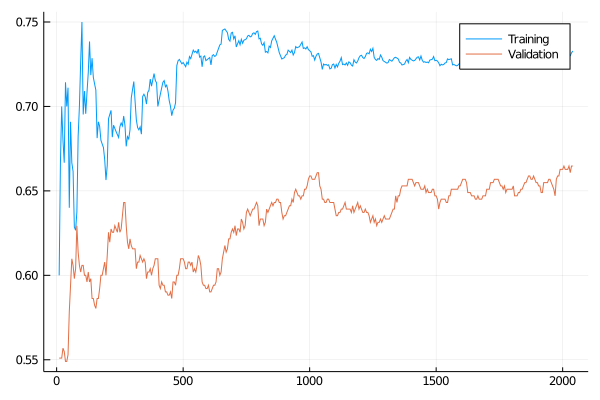

In [52]:
plot(data_schedule, training_losses, label="Training")
plot!(data_schedule, valid_losses, label="Validation")

# Final Results

In [53]:
knn_final = KNNClassifier(K=best.best_model.K)

KNNClassifier(
    K = 10,
    algorithm = :kdtree,
    metric = Euclidean(0.0),
    leafsize = 10,
    reorder = true,
    weights = :uniform) @757

In [54]:
KNN_Final = machine(knn_final, X, y)

Machine{KNNClassifier} @364 trained 0 times.
  args: 
    1:	Source @319 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @853 ⏎ `AbstractArray{Multiclass{3},1}`


In [55]:
fit!(KNN, rows=train)

┌ Info: Training Machine{KNNClassifier} @998.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{KNNClassifier} @998 trained 8 times.
  args: 
    1:	Source @849 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @114 ⏎ `AbstractArray{Multiclass{3},1}`


In [56]:
ŷ = MLJ.predict(KNN, X_stand[test,:]);

In [57]:
cross_entropy(ŷ, y[test]) |> mean

3.1576761388633425

In [58]:
acc(ŷ, y[test])

0.6426332288401254

In [59]:
confusion_matrix(mode.(ŷ), y[test])

┌ Warning: The classes are un-ordered,
│ using order: ["EI", "IE", "N"].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:87


              ┌─────────────────────────────────────────┐
              │              Ground Truth               │
┌─────────────┼─────────────┬─────────────┬─────────────┤
│  Predicted  │     EI      │     IE      │      N      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     EI      │     129     │     40      │     100     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     IE      │      5      │     68      │     18      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│      N      │     19      │     46      │     213     │
└─────────────┴─────────────┴─────────────┴─────────────┘
